<center>
    <img src="https://play-lh.googleusercontent.com/G7jAks-PRl4d7IkL-s3Ir44nGyPq0Yh872N5UMwZYIJz4wG1Oj0DqoQjsAR5ddKZbQ=w412-h220-rw"  />
</center>

# Amazon.com - Employee Access

Design an algorithm to accurately predict the access status to certain resources of employees.

**Problem Statement Scenario:**

When employees start working in an organisation, they first need to obtain the computer access necessary to fulfill their role. This access may allow employees to read/manipulate resources through various applications or web portals. It is assumed that employees fulfilling the functions of a given role will access the same or similar resources. Often, employees figure out the access they need as they encounter roadblocks during their daily work (such as, not being able to log into a reporting portal). A knowledgeable supervisor then takes time to manually grant the access needed to overcome these obstackes. As employees change roles within a company, this access discovery/revovery cycle wastes a huge amount of time and money.

There is considerable amount of data regarding employees' roles within an organization and the resources to which they have access. Given the data related to current employees and their provisiones access, models can be built that automatically determine access privileges as employees enter and leave roles within a company. These auto-access models seek to minimize human involvement required to grant or revoke employee access.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [5]:
df_test = pd.read_csv("test.csv")
df_test.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,32642,7792,118573,118574,117945,136261,128463,292795,119082
1,2,4696,14638,117961,118343,118514,118321,289122,255851,118322
2,3,22662,1760,118887,118888,120171,118396,255118,118398,118399
3,4,75078,7576,117961,118052,120671,118321,117906,257051,118322
4,5,39879,55668,117902,118041,117945,135951,134458,19776,119082


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912363 entries, 0 to 912362
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   id                912363 non-null  int64
 1   RESOURCE          912363 non-null  int64
 2   MGR_ID            912363 non-null  int64
 3   ROLE_ROLLUP_1     912363 non-null  int64
 4   ROLE_ROLLUP_2     912363 non-null  int64
 5   ROLE_DEPTNAME     912363 non-null  int64
 6   ROLE_TITLE        912363 non-null  int64
 7   ROLE_FAMILY_DESC  912363 non-null  int64
 8   ROLE_FAMILY       912363 non-null  int64
 9   ROLE_CODE         912363 non-null  int64
dtypes: int64(10)
memory usage: 69.6 MB


In [7]:
#df_train.describe()

**This is a classification problem** 

In [8]:
allcolumns=[item for item in df_train.columns]
allcolumns

['ACTION',
 'RESOURCE',
 'MGR_ID',
 'ROLE_ROLLUP_1',
 'ROLE_ROLLUP_2',
 'ROLE_DEPTNAME',
 'ROLE_TITLE',
 'ROLE_FAMILY_DESC',
 'ROLE_FAMILY',
 'ROLE_CODE']

In [9]:
for item in allcolumns:
    print(item,": \n", df_train[item].unique())

ACTION : 
 [1 0]
RESOURCE : 
 [39353 17183 36724 ... 32529 16354 32147]
MGR_ID : 
 [85475  1540 14457 ... 16820 60086 22355]
ROLE_ROLLUP_1 : 
 [117961 118219 117929 117951 118079 117902 118315  91261 118216 118090
 118752 119134 117926 117890 117916 118212 118256 118555 118602 118269
 118106 117975 118573 118169 117910 121785 117980 120342 119062 117887
 118887 118114 120864 119596 119301 117983 118441 118595 118181 117876
 117935 118074 119920 118084 118990 118163 122880 118290 119280 118976
 117932 117922 126918 118023 117978 119691 130570 117959 124034 117943
 119170 119665 118658 118192 138798 118006 118582 203209   4292 132839
 118095   5110 117918 126974 120140 118953 118138 118120 118550 119402
 131853 117893 130684 121005 118126 118725 117993 119343  11146 118000
 120810 118541 117989 122532 117882 118185 125714 118742 118670 118200
 118349 118003 183723 120268 119828 118717 119740 119178 247952 127044
 119370 120883 119615 216705 192441 121518 118358 121411 127616 119027
 1430

* Check unique item in of each column

* Find the total no. of unique item in of each column

In [10]:
for item in allcolumns:
    print(item," : ", df_train[item].nunique())

ACTION  :  2
RESOURCE  :  7518
MGR_ID  :  4243
ROLE_ROLLUP_1  :  128
ROLE_ROLLUP_2  :  177
ROLE_DEPTNAME  :  449
ROLE_TITLE  :  343
ROLE_FAMILY_DESC  :  2358
ROLE_FAMILY  :  67
ROLE_CODE  :  343


###### Correlation explains how one or more variables are related to each other.
*  **corr()** Compute pairwise correlation of columns, excluding NA/null values.


In [11]:
correlation = df_train.corr()
correlation 

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
ACTION,1.000000,0.000185,-0.005167,-0.013702,0.005179,0.001025,-0.010169,0.003565,0.000502,0.017147
RESOURCE,0.000185,1.000000,0.011088,-0.005016,0.013438,0.030004,0.002936,0.021029,0.031060,0.007733
MGR_ID,-0.005167,0.011088,1.000000,-0.007132,-0.000364,-0.009551,0.017864,-0.018488,-0.118254,-0.004067
ROLE_ROLLUP_1,-0.013702,-0.005016,-0.007132,1.000000,0.033358,-0.009548,0.010207,-0.007546,0.029468,-0.024927
ROLE_ROLLUP_2,0.005179,0.013438,-0.000364,0.033358,1.000000,-0.006056,0.008305,0.018873,0.069558,0.015117
ROLE_DEPTNAME,0.001025,0.030004,-0.009551,-0.009548,-0.006056,1.000000,-0.006932,-0.002877,0.031669,0.010319
ROLE_TITLE,-0.010169,0.002936,0.017864,0.010207,0.008305,-0.006932,1.000000,0.170692,-0.012450,0.155920
ROLE_FAMILY_DESC,0.003565,0.021029,-0.018488,-0.007546,0.018873,-0.002877,0.170692,1.000000,-0.180596,0.092980
ROLE_FAMILY,0.000502,0.031060,-0.118254,0.029468,0.069558,0.031669,-0.012450,-0.180596,1.000000,-0.148625
ROLE_CODE,0.017147,0.007733,-0.004067,-0.024927,0.015117,0.010319,0.155920,0.092980,-0.148625,1.000000


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Plot the Correlation Matrix**

<AxesSubplot:>

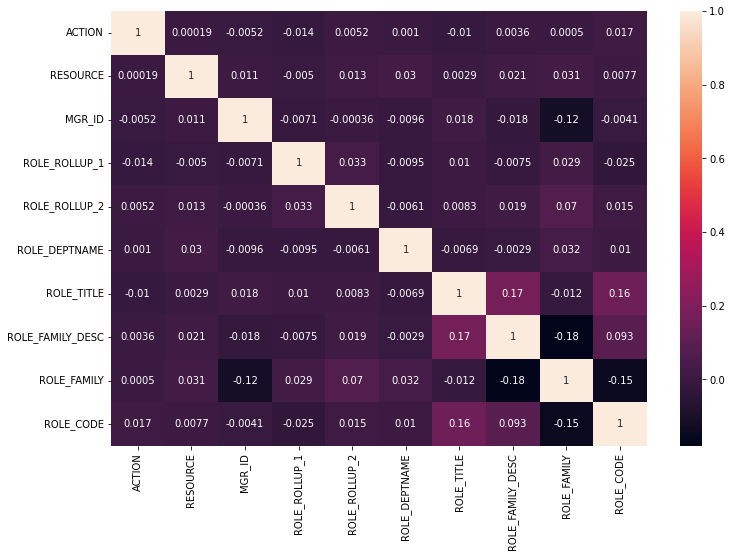

In [13]:
fig=plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot=True)

**Show the counts of observations in each categorical bin using bars.**

C:\PawanKrGunjan\VENV\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ACTION', ylabel='count'>

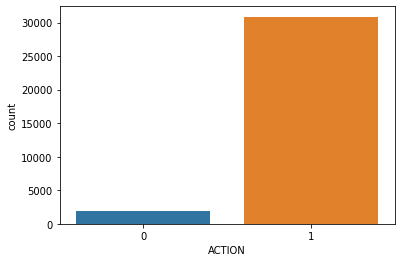

In [14]:
sns.countplot(df_train['ACTION'])

In [15]:
x=df_train.drop("ACTION",axis=1)
y=df_train["ACTION"]

###### Split the data into train & test

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=53)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


###### Apply Linear Regression

In [20]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict=lr.predict(x_test)
lr_accuracy = accuracy_score(y_test,lr_predict)
lr_accuracy

0.9418167022683348

**Confusion Matrix**

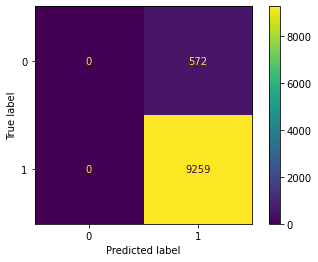

In [21]:
cnf_lr=confusion_matrix(y_test, lr_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_lr,display_labels=lr.classes_)
disp.plot()

* It hasn't predicted any item as class 0

#### Apply Random Forest classifier

In [22]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)
rf_accuracy=accuracy_score(y_test,rf_predict)
rf_accuracy

0.9443596785677958

**Confusion Matrix**

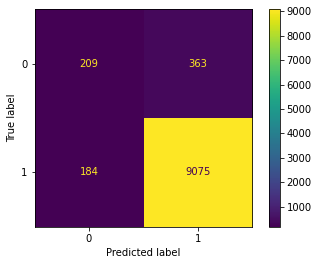

In [23]:
cnf_rf=confusion_matrix(y_test, rf_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_rf,display_labels=rf.classes_)
disp.plot()

#### Apply Ada Boost Classifier

In [24]:
adaboost = AdaBoostClassifier()
adaboost.fit(x_train, y_train)
adaboost_pred=adaboost.predict(x_test)
ab_accuracy=accuracy_score(y_test,adaboost_pred)
ab_accuracy

0.9418167022683348

**Confusion Matrix**

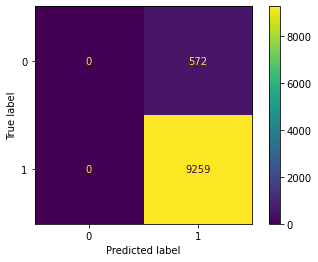

In [25]:
cnf_ab=confusion_matrix(y_test, adaboost_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_ab,display_labels=adaboost.classes_)
disp.plot()

 ***** It hasn't predicted any item as class 0 *****

#### Apply Gradient Boosting Classifier

In [26]:
gradBoost = GradientBoostingClassifier()
gradBoost.fit(x_train, y_train)
gradBoost_pred=gradBoost.predict(x_test)
gb_accuracy = accuracy_score(y_test,gradBoost_pred)
gb_accuracy

0.942325297528227

##### Confusion Matrix

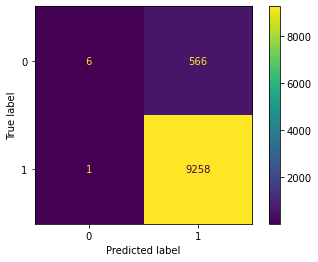

In [27]:
cnf_gb=confusion_matrix(y_test, gradBoost_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_gb,display_labels=gradBoost.classes_)
disp.plot()

 ***** It has predicted very less item as class 0 *****

#### **Random Forest classifier has given better result as compare to other classifier**

### Apply random forest classifier on test data

In [28]:
df_test.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,32642,7792,118573,118574,117945,136261,128463,292795,119082
1,2,4696,14638,117961,118343,118514,118321,289122,255851,118322
2,3,22662,1760,118887,118888,120171,118396,255118,118398,118399
3,4,75078,7576,117961,118052,120671,118321,117906,257051,118322
4,5,39879,55668,117902,118041,117945,135951,134458,19776,119082


In [29]:
df_test.drop("id",axis=1, inplace=True)

In [30]:
print (x_train.shape)
print (df_test.shape)

(22938, 9)
(912363, 9)


In [31]:
rf_pred = rf.predict(df_test)
rf_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [32]:
df_test['ACTION']= rf_pred
df_test.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ACTION
0,32642,7792,118573,118574,117945,136261,128463,292795,119082,1
1,4696,14638,117961,118343,118514,118321,289122,255851,118322,1
2,22662,1760,118887,118888,120171,118396,255118,118398,118399,1
3,75078,7576,117961,118052,120671,118321,117906,257051,118322,1
4,39879,55668,117902,118041,117945,135951,134458,19776,119082,1


In [33]:
Correlation= df_test.corr()
Correlation

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ACTION
RESOURCE,1.000000,0.011355,-0.032546,-0.015819,0.012635,-0.098265,0.007529,0.024559,0.032996,0.006840
MGR_ID,0.011355,1.000000,-0.008588,-0.000832,-0.023357,0.099798,0.023996,-0.025069,0.078449,-0.004398
ROLE_ROLLUP_1,-0.032546,-0.008588,1.000000,0.141075,0.001413,0.044590,0.006588,-0.002068,-0.002274,-0.003228
ROLE_ROLLUP_2,-0.015819,-0.000832,0.141075,1.000000,-0.060660,0.011655,0.001151,0.006622,-0.008878,-0.005280
ROLE_DEPTNAME,0.012635,-0.023357,0.001413,-0.060660,1.000000,-0.054658,0.086462,0.029590,-0.005388,0.019915
ROLE_TITLE,-0.098265,0.099798,0.044590,0.011655,-0.054658,1.000000,0.081220,-0.071280,0.138510,-0.003186
ROLE_FAMILY_DESC,0.007529,0.023996,0.006588,0.001151,0.086462,0.081220,1.000000,-0.041336,0.057981,-0.013184
ROLE_FAMILY,0.024559,-0.025069,-0.002068,0.006622,0.029590,-0.071280,-0.041336,1.000000,0.001046,-0.032830
ROLE_CODE,0.032996,0.078449,-0.002274,-0.008878,-0.005388,0.138510,0.057981,0.001046,1.000000,0.004747
ACTION,0.006840,-0.004398,-0.003228,-0.005280,0.019915,-0.003186,-0.013184,-0.032830,0.004747,1.000000


<AxesSubplot:>

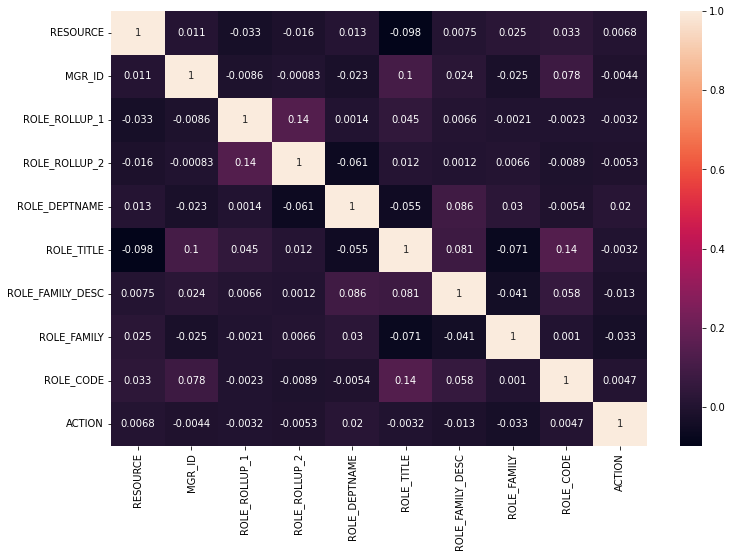

In [34]:
fig=plt.figure(figsize=(12,8))
sns.heatmap(Correlation,annot=True)

Following actions is performed:
* Understand the type of data.
* Identify the output variable.
* Check if there are any biases in your dataset.
* Perform train test split.
* Predict the accuracy using classification models.
* Check and compare the accuracy of the different models.